In [1]:
import sys
import numpy as np
import multiprocessing as mp
import pandas as pd
sys.path.append('/Users/Ziqi/Desktop/mgwr-optim/')
from mgwr.gwr import GWR,MGWR
from mgwr.sel_bw import Sel_BW
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\libpysal\io\iohandlers\__init__.py:25: UserWarning: SQLAlchemy and Geomet not installed, database I/O disabled
  warnings.warn('SQLAlchemy and Geomet not installed, database I/O disabled')


In [2]:
n = 625
b0 = 3
b1 = np.zeros((25,25))
b2 = np.zeros((25,25))
e = np.zeros((25,25))

for i in range(25):
    for j in range(25):
        b1[i][j] = 1+ 1/12*(i+j)
        b2[i][j] = 1+ 1/324*(36-(6-i/2)**2)*(36-(6-j/2)**2)
        e[i][j] = np.random.normal(0, 0.5)

betas = np.hstack((b1.reshape(-1,1), b2.reshape(-1,1)))
err = e.reshape(-1,1)
X = np.random.randn(n,2)
y = b0 + np.sum(betas*X,axis=1).reshape(-1,1)
u = np.array([np.linspace(0, 24, num=25)]*25).reshape(-1)
v = np.array([np.linspace(0, 24, num=25)]*25).T.reshape(-1)
n = y.shape[0]
coords = list(zip(u,v))

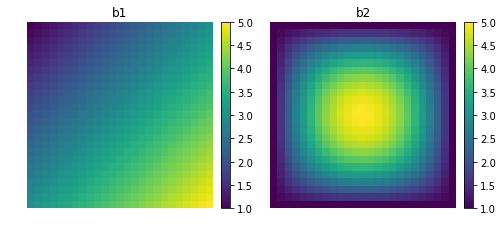

In [3]:
plt.figure(1,figsize=(8, 8))
plt.subplot(121)
plt.title('b1')
plt.imshow(betas[:,0].reshape(25,25),vmin=1,vmax=5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')
plt.subplot(122)
plt.title('b2')
plt.imshow(betas[:,1].reshape(25,25),vmin=1,vmax=5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')
im = plt.show()

In [4]:
pool=mp.Pool()

In [5]:
%%time
se = Sel_BW(coords,y,X,multi=True)
bws = se.search(pool=pool)


Wall time: 7.43 s


In [6]:
%%time
mgwr_results = MGWR(coords,y,X,selector=se).fit(pool=pool)


Wall time: 1.66 s


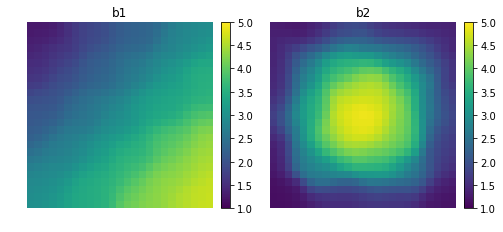

In [7]:
plt.figure(1,figsize=(8, 8))
plt.subplot(121)
plt.title('b1')
plt.imshow(mgwr_results.params[:,1].reshape(25,25),vmin=1,vmax=5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')
plt.subplot(122)
plt.title('b2')
plt.imshow(mgwr_results.params[:,2].reshape(25,25),vmin=1,vmax=5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')
im = plt.show()